In [1]:
!pip install earthpy gdal seaborn geopandas

     |████████████████████████████████| 1.4MB 2.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 972kB 12.9MB/s 
     |████████████████████████████████| 18.1MB 231kB/s 
     |████████████████████████████████| 14.8MB 324kB/s 
     |████████████████████████████████| 10.9MB 45.0MB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp36-none-any.whl size=1365088 sha256=de83f0857599f87029307e35b18b96ba5602b1fcc39e764a4c240b2d8112fb6c
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy


In [2]:
import numpy as np
from numpy import nan_to_num, subtract, add, divide, multiply
from osgeo import gdal, gdalconst
from gdal import GetDriverByName

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
%cd 'drive/My Drive/NASA SPACE APP' 

/content/drive/.shortcut-targets-by-id/1-DzXj6vS4v93jHi8NfFMhO2Krq3cCtZ2/NASA SPACE APP


In [12]:
from glob import glob
import os
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import patches as mpatches
from matplotlib.colors import ListedColormap
from matplotlib import colors
import matplotlib as mpl
import seaborn as sns

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import gdal 

import geopandas as gpd
from shapely.geometry import mapping, box

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

Before Flood Sentinel

In [13]:
all_sentinel_bands = glob("Bihar Flood/Before Flood_sentinel/GRANULE/L1C_T46REQ_A025112_20200413T042800/IMG_DATA/*B[0-1]*.jp2")

all_sentinel_bands.sort()
all_sentinel_bands

['Bihar Flood/Before Flood_sentinel/GRANULE/L1C_T46REQ_A025112_20200413T042800/IMG_DATA/T46REQ_20200413T041551_B01.jp2',
 'Bihar Flood/Before Flood_sentinel/GRANULE/L1C_T46REQ_A025112_20200413T042800/IMG_DATA/T46REQ_20200413T041551_B02.jp2',
 'Bihar Flood/Before Flood_sentinel/GRANULE/L1C_T46REQ_A025112_20200413T042800/IMG_DATA/T46REQ_20200413T041551_B03.jp2',
 'Bihar Flood/Before Flood_sentinel/GRANULE/L1C_T46REQ_A025112_20200413T042800/IMG_DATA/T46REQ_20200413T041551_B04.jp2',
 'Bihar Flood/Before Flood_sentinel/GRANULE/L1C_T46REQ_A025112_20200413T042800/IMG_DATA/T46REQ_20200413T041551_B05.jp2',
 'Bihar Flood/Before Flood_sentinel/GRANULE/L1C_T46REQ_A025112_20200413T042800/IMG_DATA/T46REQ_20200413T041551_B06.jp2',
 'Bihar Flood/Before Flood_sentinel/GRANULE/L1C_T46REQ_A025112_20200413T042800/IMG_DATA/T46REQ_20200413T041551_B07.jp2',
 'Bihar Flood/Before Flood_sentinel/GRANULE/L1C_T46REQ_A025112_20200413T042800/IMG_DATA/T46REQ_20200413T041551_B08.jp2',
 'Bihar Flood/Before Flood_senti

In [14]:
all_sentinel_bands[2], all_sentinel_bands[7]

('Bihar Flood/Before Flood_sentinel/GRANULE/L1C_T46REQ_A025112_20200413T042800/IMG_DATA/T46REQ_20200413T041551_B03.jp2',
 'Bihar Flood/Before Flood_sentinel/GRANULE/L1C_T46REQ_A025112_20200413T042800/IMG_DATA/T46REQ_20200413T041551_B08.jp2')

In [15]:
with rio.open(all_sentinel_bands[2]) as  f1:
    green_b = reshape_as_image(f1.read())

with rio.open(all_sentinel_bands[7]) as  f2:
    nir_b = reshape_as_image(f2.read())

In [16]:
def show_band(img, title='', size=(6,6), cmap='viridis'):
  # colors = ["g", "yellowgreen",
  #             "peachpuff", "coral", "maroon"]
  # cmap = ListedColormap(colors)
  print(title+' Shape: ', img.shape)
  fig = plt.figure(figsize=size)
  plt.imshow(img.reshape(img.shape[0], img.shape[1]), cmap= cmap)
  plt.axis('off')
  plt.colorbar()
  plt.title(title)
  plt.show()

Green Band Shape:  (10980, 10980, 1)


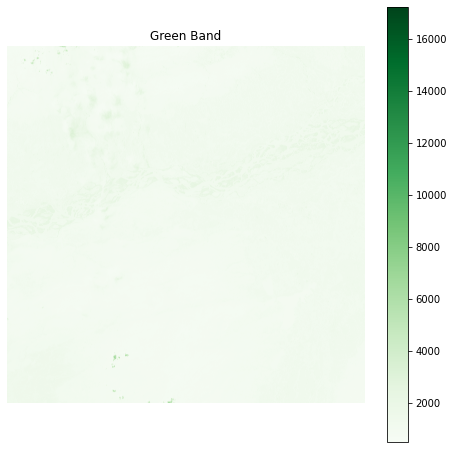

In [ ]:
show_band(green_b, title='Green Band', size = (8, 8), cmap='Greens')

NIR Band Shape:  (10980, 10980, 1)


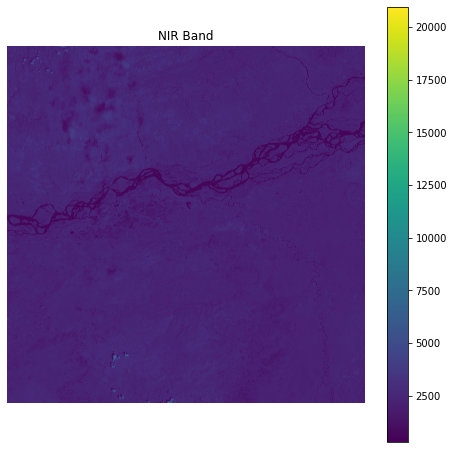

In [ ]:
show_band(nir_b, 'NIR Band', (8,8))

NDWI Shape:  (10980, 10980, 1)


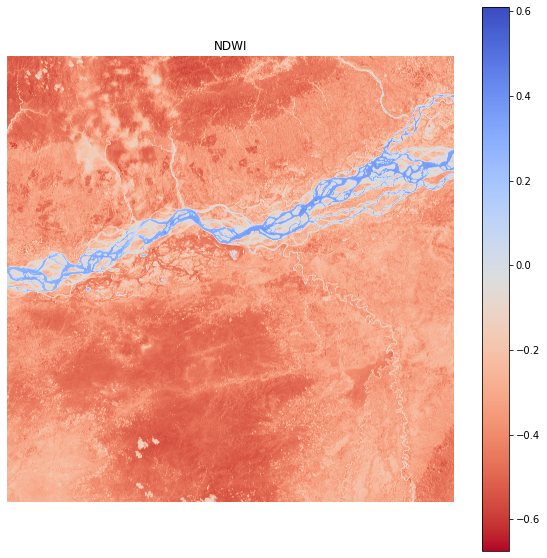

In [17]:
ndwi2 = (green_b.astype(float)-nir_b.astype(float))/(green_b+nir_b)
show_band(ndwi2, title='NDWI', size=(10,10), cmap='coolwarm_r')

In [ ]:
import numpy as np
from numpy import nan_to_num, subtract, add, divide, multiply
from osgeo import gdal, gdalconst
from gdal import GetDriverByName

In [ ]:
b4 = rio.open(all_sentinel_bands[3])
b3 = rio.open(all_sentinel_bands[2])
b2 = rio.open(all_sentinel_bands[1])

In [ ]:
meta = b4.meta
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)
with rio.open('Bihar Flood/Before Flood_sentinel/NDWI_before_flood.tiff', 'w', **meta) as dst:
     dst.write(reshape_as_raster(ndwi2.astype(rio.float32)))

In [ ]:
ndwi_raster = rio.open('Bihar Flood/Before Flood_sentinel/NDWI_before_flood.tiff')

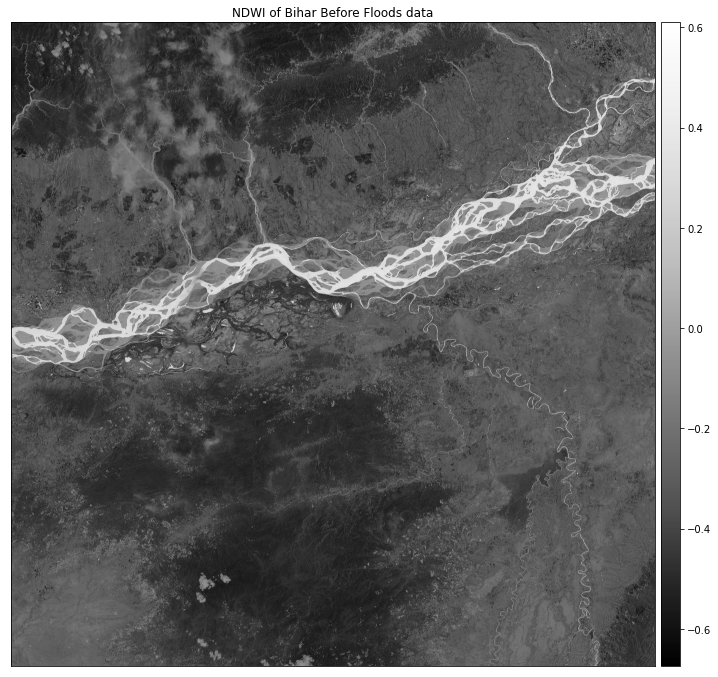

In [ ]:
ep.plot_bands(ndwi_raster.read(), title='NDWI of Bihar Before Floods data')

Post Flood Bihar

In [ ]:
all_sentinel_bands_post_flood = glob(
    "Bihar Flood/After Flood_sentinel/GRANULE/L1C_T46REQ_A016847_20200528T041843/IMG_DATA/*B[0-1]*.jp2")

all_sentinel_bands_post_flood.sort()
print(all_sentinel_bands_post_flood)

['Bihar Flood/After Flood_sentinel/GRANULE/L1C_T46REQ_A016847_20200528T041843/IMG_DATA/T46REQ_20200528T041549_B01.jp2', 'Bihar Flood/After Flood_sentinel/GRANULE/L1C_T46REQ_A016847_20200528T041843/IMG_DATA/T46REQ_20200528T041549_B02.jp2', 'Bihar Flood/After Flood_sentinel/GRANULE/L1C_T46REQ_A016847_20200528T041843/IMG_DATA/T46REQ_20200528T041549_B03.jp2', 'Bihar Flood/After Flood_sentinel/GRANULE/L1C_T46REQ_A016847_20200528T041843/IMG_DATA/T46REQ_20200528T041549_B04.jp2', 'Bihar Flood/After Flood_sentinel/GRANULE/L1C_T46REQ_A016847_20200528T041843/IMG_DATA/T46REQ_20200528T041549_B05.jp2', 'Bihar Flood/After Flood_sentinel/GRANULE/L1C_T46REQ_A016847_20200528T041843/IMG_DATA/T46REQ_20200528T041549_B06.jp2', 'Bihar Flood/After Flood_sentinel/GRANULE/L1C_T46REQ_A016847_20200528T041843/IMG_DATA/T46REQ_20200528T041549_B07.jp2', 'Bihar Flood/After Flood_sentinel/GRANULE/L1C_T46REQ_A016847_20200528T041843/IMG_DATA/T46REQ_20200528T041549_B08.jp2', 'Bihar Flood/After Flood_sentinel/GRANULE/L1C_T

In [ ]:
# run once, only to generate the RGB composite image.

af_b4 = rio.open(all_sentinel_bands_post_flood[3])
af_b3 = rio.open(all_sentinel_bands_post_flood[2])
af_b2 = rio.open(all_sentinel_bands_post_flood[1])


# Create an RGB image 
with rio.open('Bihar Flood/After Flood_sentinel/After_Flood_RGB.tiff','w',driver='Gtiff', width=af_b4.width, height=af_b4.height, 
              count=3,crs=af_b4.crs,transform=af_b4.transform, dtype=af_b4.dtypes[0]) as rgb_af:
    rgb_af.write(af_b4.read(1),1) 
    rgb_af.write(af_b3.read(1),2) 
    rgb_af.write(af_b2.read(1),3) 
    rgb_af.close()

In [ ]:
with rio.open('After Flood_Sentinel/After_Flood_RGB.tiff') as rgb_af:
  data_af = rgb_af.read()

data_af.shape

(3, 10980, 10980)

In [ ]:
with rio.open(all_sentinel_bands_post_flood[2]) as  f1:
    post_f_green_b = reshape_as_image(f1.read())

with rio.open(all_sentinel_bands_post_flood[7]) as  f2:
    post_f_nir_b = reshape_as_image(f2.read())

Green Band Shape:  (10980, 10980, 1)


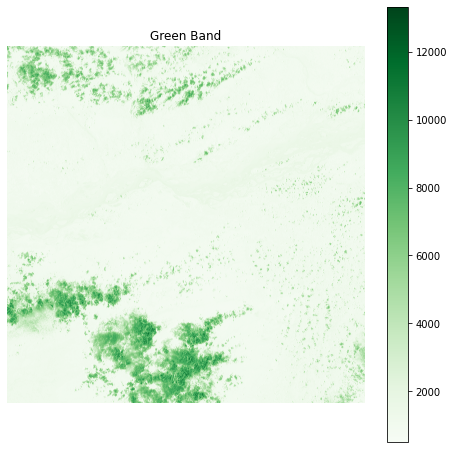

NIR Band Shape:  (10980, 10980, 1)


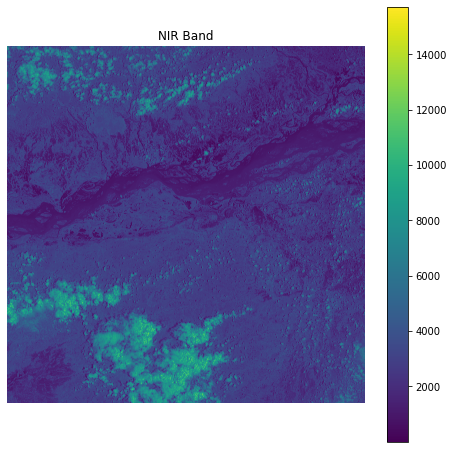

In [ ]:
show_band(post_f_green_b, title='Green Band', size = (8, 8), cmap='Greens')

show_band(post_f_nir_b, 'NIR Band', (8,8))

In [ ]:
ndwi_af = (post_f_green_b.astype(float)-post_f_nir_b.astype(float))/(post_f_green_b+post_f_nir_b)

NDWI After Flood Shape:  (10980, 10980, 1)


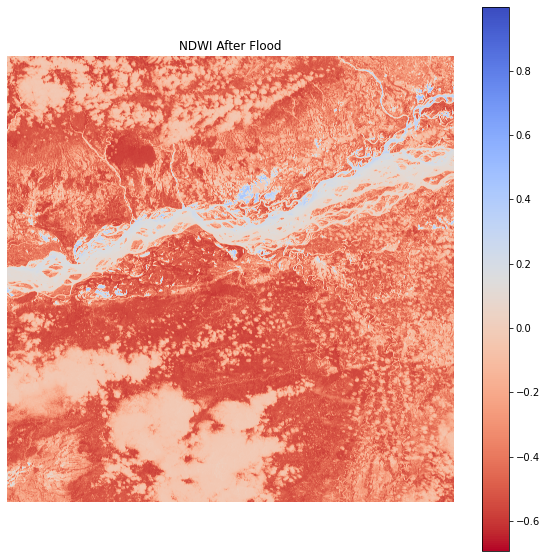

In [ ]:
show_band(ndwi_af, title='NDWI After Flood', size=(10,10), cmap='coolwarm_r')

In [ ]:
meta = af_b4.meta
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)
with rio.open('Bihar Flood/After Flood_sentinel/NDWI_after_flood.tiff', 'w', **meta) as dst:
     dst.write(reshape_as_raster(ndwi_af.astype(rio.float32)))

In [ ]:
ndwi_raster_af = rio.open('Bihar Flood/After Flood_sentinel/NDWI_after_flood.tiff')

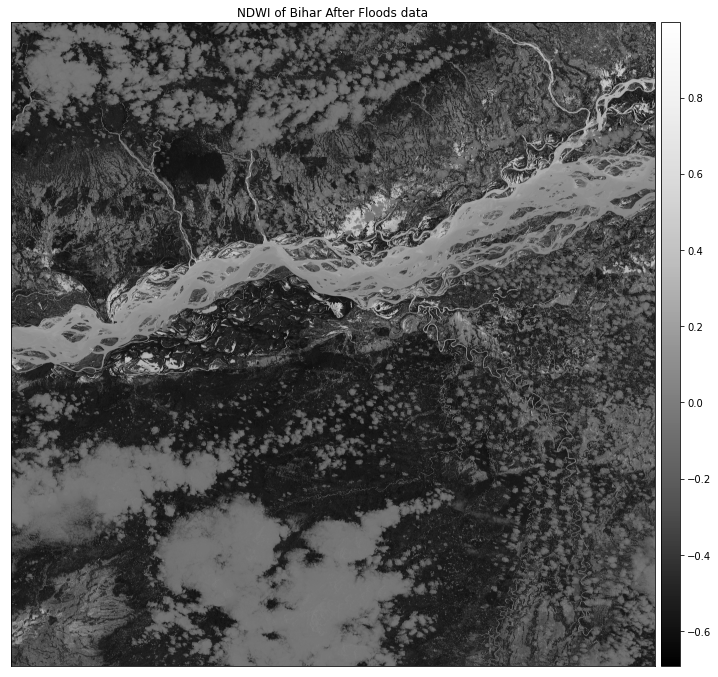

In [ ]:
ep.plot_bands(ndwi_raster_af.read(), title='NDWI of Bihar After Floods data')

In [ ]:
ndwi_af = ndwi_raster_af.read()

In [ ]:
import numpy as np
mask_af = ndwi_af < 0.0

In [ ]:
mask = mask_af.astype(int)

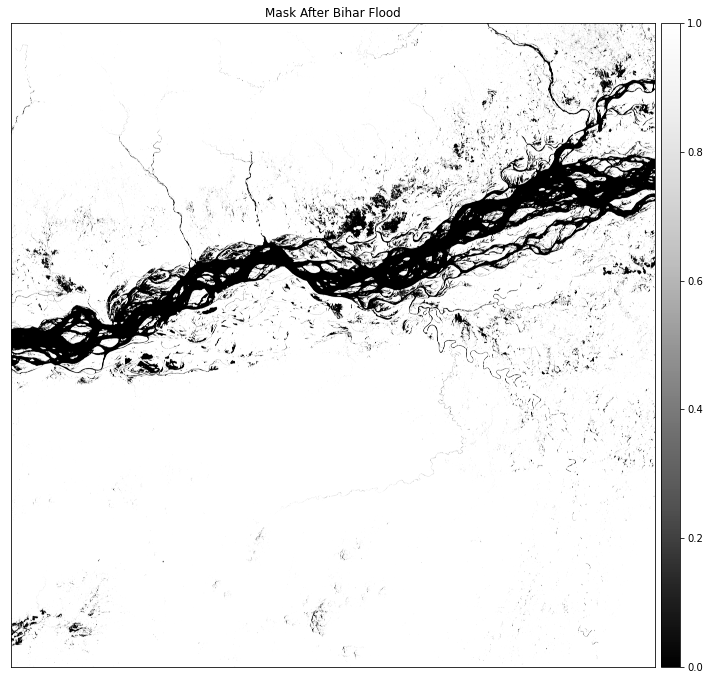

In [ ]:
ep.plot_bands(mask_af, title='Mask After Bihar Flood')

In [ ]:
# Read the saved before flood
ndwi_raster = rio.open('Bihar Flood/Before Flood_sentinel/NDWI_before_flood.tiff')
ndwi = ndwi_raster.read()

In [ ]:
mask = ndwi < 0.0

mask = mask.astype(int)

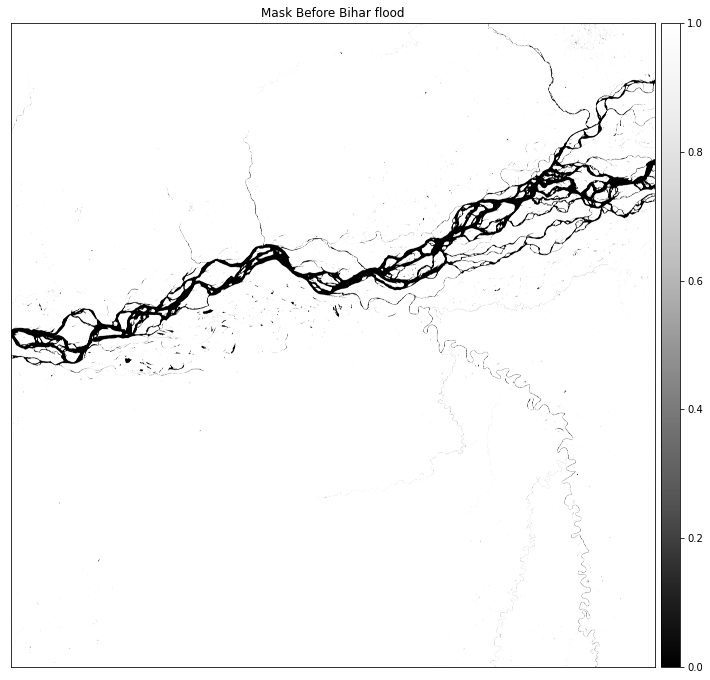

In [ ]:
ep.plot_bands(mask, title = 'Mask Before Bihar flood')

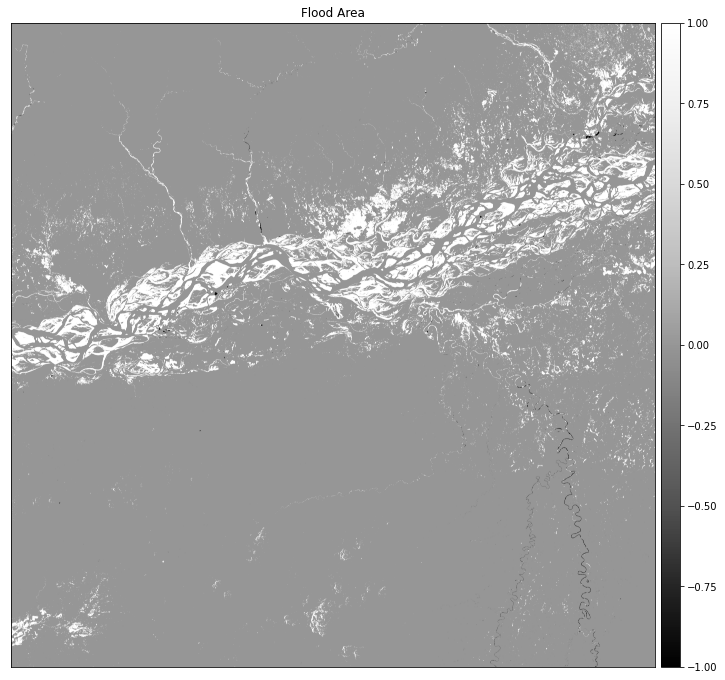

In [ ]:
resulted_mask = mask - mask_af
ep.plot_bands(resulted_mask, title='Flood Area')

In [ ]:
# replace -1 with 0

resulted_mask[resulted_mask == -1] = 0

# replace values > 0 with 1
resulted_mask[resulted_mask > 0] = 1

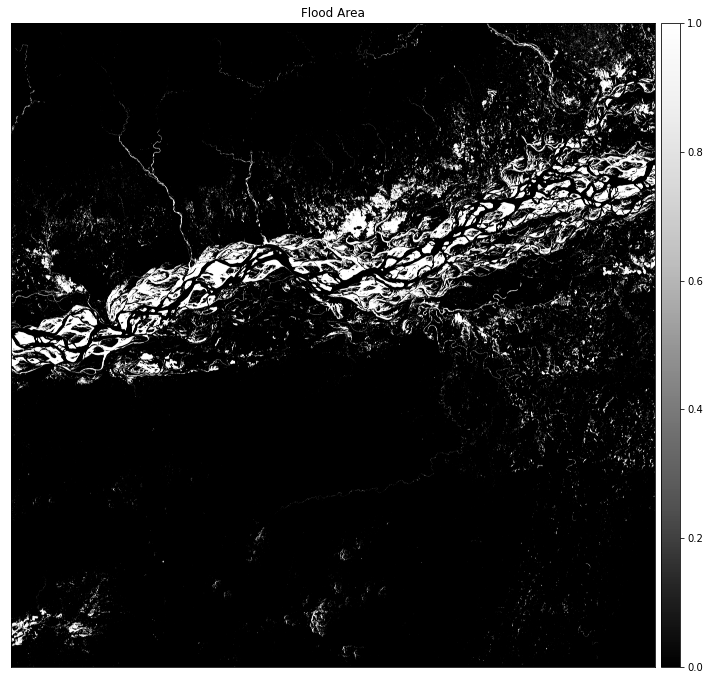

In [ ]:
ep.plot_bands(resulted_mask, title='Flood Area')

In [ ]:
with rio.open('Bihar Flood/After Flood_sentinel/flood_GT.tiff', 'w', driver='GTiff', dtype=rio.float32, width= resulted_mask.shape[2] , height = resulted_mask.shape[1], count=1) as gt:
     gt.write(resulted_mask.astype(rio.float32))

/usr/local/lib/python3.6/dist-packages/rasterio/__init__.py:235: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  **kwargs)


/usr/local/lib/python3.6/dist-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


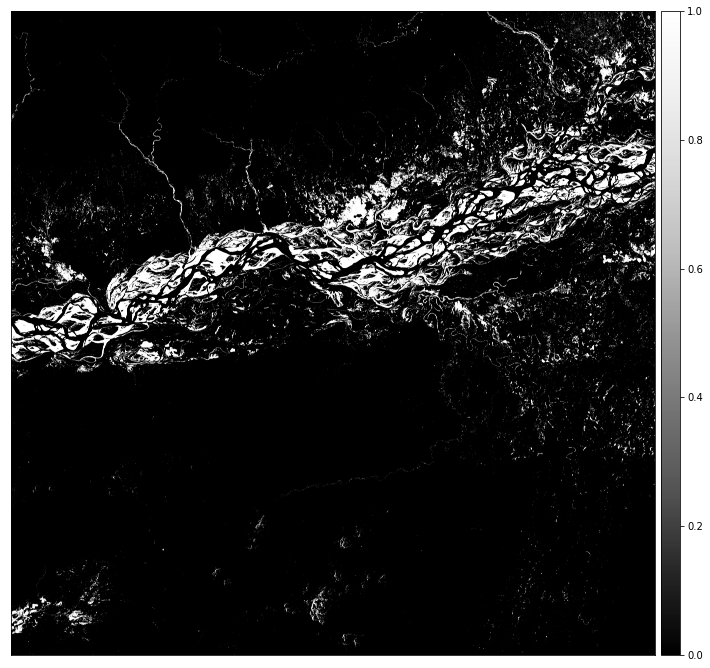

In [ ]:
# Read the saved 
gt = rio.open('Bihar Flood/After Flood_sentinel/flood_GT.tiff').read()

ep.plot_bands(gt)

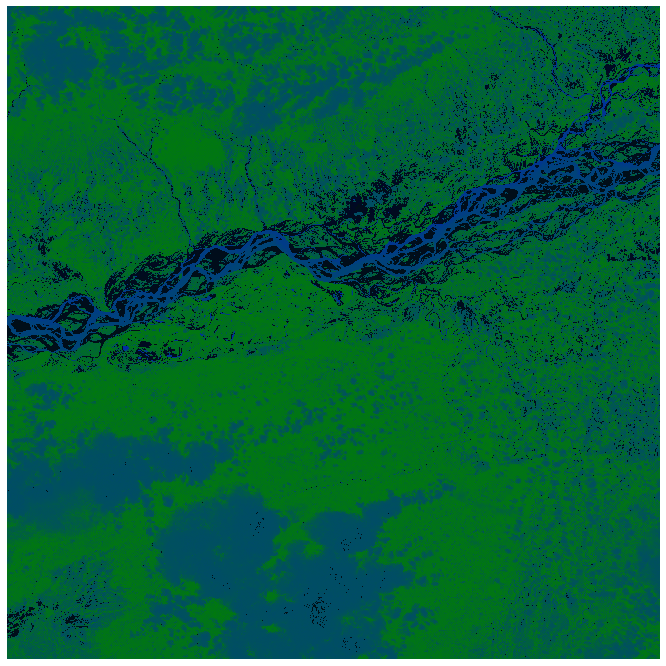

In [ ]:
from matplotlib.colors import colorConverter
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# create dummy data
zvals = ndwi_af.reshape(ndwi.shape[1:])
zvals2 = resulted_mask.reshape(resulted_mask.shape[1:])

# generate the colors for your colormap
color1 = colorConverter.to_rgba('white')
color2 = colorConverter.to_rgba('black')

# make the colormaps
cmap1 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap',['green','blue'],256)
cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap2',[color1,color2],256)

cmap2._init() # create the _lut array, with rgba values

# create your alpha array and fill the colormap with them.
# here it is progressive, but you can create whathever you want
alphas = np.linspace(0, 0.8, cmap2.N+3)
cmap2._lut[:,-1] = alphas

fig = plt.figure(figsize=(12, 12)) 
plt.imshow(zvals, interpolation='nearest', cmap= cmap1, )
plt.imshow(zvals2, interpolation='nearest', cmap=cmap2, label='flood')
# plt.colorbar()
plt.axis('off')

# patches = mpatches.Patch(color=cmap2, label="Flood")
# plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
plt.show()

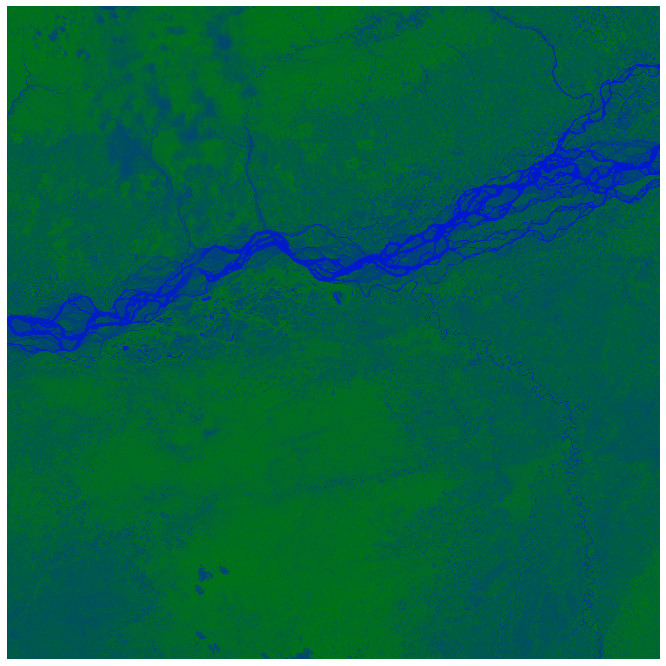

In [ ]:
# create dummy data
zvals = ndwi.reshape(ndwi_af.shape[1:])
zvals2 = np.zeros(resulted_mask.shape[1:])

# generate the colors for your colormap
color1 = colorConverter.to_rgba('white')
color2 = colorConverter.to_rgba('black')

# make the colormaps
cmap1 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap',['green','blue'],256)
cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap2',[color1,color2],256)

cmap2._init() # create the _lut array, with rgba values

# create your alpha array and fill the colormap with them.
# here it is progressive, but you can create whathever you want
alphas = np.linspace(0, 0.8, cmap2.N+3)
cmap2._lut[:,-1] = alphas

fig = plt.figure(figsize=(12, 12)) 
plt.imshow(zvals, interpolation='nearest', cmap= cmap1, )
plt.imshow(zvals2, interpolation='nearest', cmap=cmap2, label='flood')
# plt.colorbar()
plt.axis('off')

# patches = mpatches.Patch(color=cmap2, label="Flood")
# plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
plt.show()